In [1]:
%matplotlib inline
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import datetime

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation, Reshape, GlobalAveragePooling2D
from keras.models import load_model
from keras.backend.tensorflow_backend import set_session
from keras.callbacks import TensorBoard

import skimage
from skimage import io, color, transform

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Mendefinisikan Fungsi
def set_gpu_mem_alloc(mem_use):
    avail  = 2004
    percent = mem_use / avail
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = percent
    config.gpu_options.visible_device_list = "0"
    set_session(tf.Session(config=config))

set_gpu_mem_alloc(1500)

# print("Success import all library!")

In [30]:
batch_size = 64
h,w,d = 224,224,3
epochs = 10

date_str = datetime.datetime.now().strftime("%d%m%y_%H%M")


train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(h, w),
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(h, w),
        class_mode='categorical')

Found 283 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [44]:
x_train, y_train = train_generator.next()
# x,y = val_generator.next()

x_test, y_test = test_generator.next()
# for i in range(0,1):
#     image = x_test[i]
#     plt.imshow(image)
#     plt.show()
#     print(y_test[i])

In [45]:
num_class = len(train_generator.class_indices)
train_step = len(train_generator.classes)
valid_step = len(test_generator.classes)

print('NUM Classes => ', num_class)
print('Train Step  => ',  train_step)
print('Valid Step  => ',  valid_step)

NUM Classes =>  4
Train Step  =>  283
Valid Step  =>  121


In [46]:
ksize = (4,4)
psize = (3,3)

input_shape = (h,w,d)


model = Sequential()

model.add(Conv2D(32,kernel_size=ksize, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=psize))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
model.summary()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 221, 221, 32)      1568      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 170528)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                5456928   
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
Total params: 5,459,092
Trainable params: 5,459,092
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc','mse'])

In [48]:
# untuk liat log history
tb1_path = 'log/'+date_str
pathlib.Path(tb1_path).mkdir(parents=True, exist_ok=True)
#training
tensorboard = TensorBoard( log_dir=tb1_path, histogram_freq=0,
                            write_graph=True, write_images=True)

In [49]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_step // batch_size,
    epochs=25,
    validation_data=test_generator,
    validation_steps=valid_step // batch_size,
    callbacks=[tensorboard],
    verbose=1
)

scores = model.evaluate(x_test, y_test, verbose=0)
print(scores)

Epoch 1/25
4/4 [==============================] - 3s 793ms/step - loss: 8.1445 - acc: 0.2891 - mean_squared_error: 0.3202 - val_loss: 7.0446 - val_acc: 0.3125 - val_mean_squared_error: 0.3365
Epoch 2/25
4/4 [==============================] - 2s 596ms/step - loss: 10.4141 - acc: 0.2027 - mean_squared_error: 0.3965 - val_loss: 7.8864 - val_acc: 0.1875 - val_mean_squared_error: 0.3721
Epoch 3/25
4/4 [==============================] - 3s 643ms/step - loss: 3.4617 - acc: 0.3278 - mean_squared_error: 0.2493 - val_loss: 1.5480 - val_acc: 0.3438 - val_mean_squared_error: 0.2035
Epoch 4/25
4/4 [==============================] - 3s 648ms/step - loss: 1.7139 - acc: 0.2734 - mean_squared_error: 0.2165 - val_loss: 1.4277 - val_acc: 0.3750 - val_mean_squared_error: 0.1902
Epoch 5/25
4/4 [==============================] - 3s 639ms/step - loss: 1.4411 - acc: 0.2266 - mean_squared_error: 0.1935 - val_loss: 1.4523 - val_acc: 0.2812 - val_mean_squared_error: 0.1940
Epoch 6/25
4/4 [=======================

In [50]:
for i in range (3):
    print("%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))

loss: 121.93%
acc: 50.00%
mean_squared_error: 16.09%


Melengkung


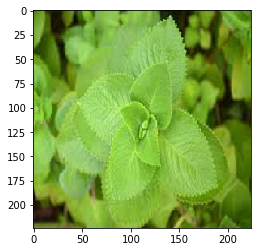

In [102]:
idx = 0
x, y = test_generator.next()
img = x[idx] * 255
img = img.astype("uint8")
plt.imshow(img, cmap = 'gray')

result = ["Melengkung", "Menjari", "Menyirip", "Sejajar"]

print(result[np.argmax(y[idx])])

In [111]:
# model.save('saved/leaf_cnn.pb')
# serialize model to JSON
model_json = model.to_json()
with open("saved/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("saved/model_new.h5")
print("Saved model to disk")

Saved model to disk


[0. 1. 0. 0.]


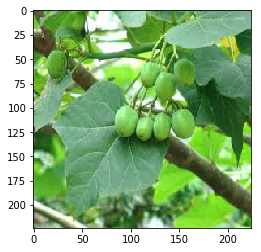

In [104]:
idx = 0
x, y = test_generator.next()
img = x[idx] * 255
img = img.astype("uint8")
plt.imshow(img, cmap = 'gray')

print(y[idx])
# for yy in y:
#     print(np.argmax(yy)+1)

# pred = model.predict(x)
# print (pred)
# for pr in pred:

#     print(np.argmax(pr)+1)